
# KNN My work

In [2]:
import pandas as pd
import sklearn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("D:\\vivek\\teleCust1000t.csv")

In [4]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df.info

<bound method DataFrame.info of      region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
5         2      41   39        0       17    78.0   2      16     0.0   
6         3      45   22        1        2    19.0   2       4     0.0   
7         2      38   35        0        5    76.0   2      10     0.0   
8         3      45   59        1        7   166.0   4      31     0.0   
9         1      68   41        1       21    72.0   1      22     0.0   
10        2       5   33        0       10   125.0   4       5     0.0   
11        3       7   35        0       14    80.0   2      15     0.0   
12    

In [11]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A8BF16780>]],
      dtype=object)

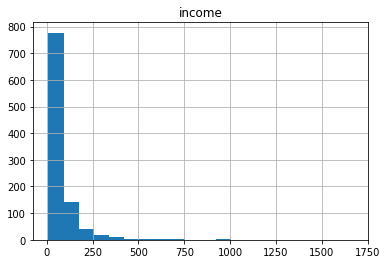

In [12]:
df.hist(column= 'income',bins= 20)


# defining new data set wiithout custcat

In [18]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [19]:
X= df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [20]:
X[0:4]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.]])

In [26]:
y=df['custcat'].values

In [27]:
y[0:4]

array([1, 4, 3, 1], dtype=int64)

now we have both factors(X&y) in numpy format
now we have to normalise data for KNN

In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

SO the data set need to trained for KNN 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=4)

In [39]:
print('Train set shape :',X_train.shape,y_train.shape)
print('Test set shape:',X_test.shape,y_test.shape)

Train set shape : (700, 11) (700,)
Test set shape: (300, 11) (300,)


trainig and testing set are ready for KNN now we have to import the library for the KNN

# KNN classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
k= 5
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
yhat= neigh.predict(X_test)
yhat[0:5]

array([3, 3, 3, 2, 4], dtype=int64)

now the accuracy of the K 

In [47]:
from sklearn import metrics

In [59]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5242857142857142
Test set Accuracy:  0.34
